<h1>Automated vs Manual Gating</h1>

In [1]:
from immunova.data.project import Project
from immunova.data.mongo_setup import global_init
from immunova.flow.gating.actions import Template
from tqdm import tqdm_notebook, tqdm
from functools import partial
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
global_init()

In [2]:
peritonitis = Project.objects(project_id='Peritonitis').get()

In [3]:
pdmc_t = peritonitis.load_experiment('PDMC_T')

In [4]:
files = [f.primary_id for f in pdmc_t.fcs_files]

In [5]:
manual_results = pd.read_excel('experiment_data/pd_manual.xlsx')

In [6]:
manual_results = manual_results[['Patient no.', 'Cell origin', 'count CD3+', 'count Vd2+ Pan gd',
       'Vd2+ Pan gd % of CD3', 'CXCR3+ Vd2+ % of Vd2', 'count Vd2- Pan gd+ ',
       'Vd2- Pan gd+ % of CD3', 'count MAITs', 'MAITs % CD3',
       'CXCR3+ CD8+ MAITs % of MAITs', 'CXCR3+ CD8- MAITs % of MAITs',
       'CD8+ MAITs % of MAITs', 'CD4+ MAITs % of MAITs', 'count CD8+',
       'CD8+ CXCR3+ % of CD8', 'CD8+ CD45RA- CD27+ % of CD8',
       'CD8+ CD45RA+ CD27+ % of CD8', 'CD8+ CD45RA+ CD27- % of CD8',
       'CD8+ CD45RA- CD27- % of CD8', 'CD8+ CD45RA- CCR7+ % of CD8',
       'CD8+ CD45RA+CCR7+ % of CD8', 'CD8+ CD45RA+ CCR7- % of CD8',
       'CD8+ CD45RA- CCR7- % of CD8', 'count CD4+', 'CD4+CXCR3+ % of CD4+',
       'CD4+CD45RA- CD27+ % of CD4+', 'CD4+CD45RA+ CD27+ % of CD4+',
       'CD4+CD45RA+ CD27- % of CD4+', 'CD4+CD45RA- CD27- % of CD4+',
       'CD4+CD45RA- CCR7+ % of CD4+', 'CD4+CD45RA+ CCR7+ % of CD4+',
       'CD4+CD45RA+ CCR7- % of CD4+', 'CD4+CD45RA- CCR7- % of CD4+',
       'Vd2+ Pan gd+ CD45RA- CD27+ % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA+ CD27+ % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA+ CD27- % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA- CD27- % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA- CCR7+ % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA+ CCR7+ % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA+ CCR7- % of Vd2+ Pan gd+',
       'Vd2+ Pan gd+ CD45RA- CCR7- % of Vd2+ Pan gd+',
       'MAITs  CD45RA- CD27+ % of MAITs', 'MAITs  CD45RA+ CD27+ % of MAITs',
       'MAITs  CD45RA+ CD27- % of MAITs', 'MAITs  CD45RA- CD27- % of MAITs',
       'MAITs  CD45RA- CCR7+ % of MAITs', 'MAITs  CD45RA+ CCR7+ % of MAITs',
       'MAITs  CD45RA+ CCR7- % of MAITs', 'MAITs  CD45RA- CCR7- % of MAITs',
       'CD3+ % of total', 'Cell count for FACS T cell panel']]

In [7]:
manual_results = manual_results[manual_results['Cell origin'] == 'PDMC']

In [8]:
manual_results.head()

,Patient no.,Cell origin,count CD3+,count Vd2+ Pan gd,Vd2+ Pan gd % of CD3,CXCR3+ Vd2+ % of Vd2,count Vd2- Pan gd+,Vd2- Pan gd+ % of CD3,count MAITs,MAITs % CD3,...,MAITs CD45RA- CD27+ % of MAITs,MAITs CD45RA+ CD27+ % of MAITs,MAITs CD45RA+ CD27- % of MAITs,MAITs CD45RA- CD27- % of MAITs,MAITs CD45RA- CCR7+ % of MAITs,MAITs CD45RA+ CCR7+ % of MAITs,MAITs CD45RA+ CCR7- % of MAITs,MAITs CD45RA- CCR7- % of MAITs,CD3+ % of total,Cell count for FACS T cell panel
48,142-09,PDMC,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,1000000
49,175-09,PDMC,70936,633,0.91,13.4,134,0.19,322,0.47,...,28.6,4.35,3.73,63.4,76.7,6.83,1.24,15.2,18.5,3834.38
50,209-03,PDMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1000000
51,209-05,PDMC,1109,30,2.79,80,2,0.19,16,1.55,...,0,0,18.8,81.2,87.5,12.5,0,0,0.000946894,1171198
52,210-12,PDMC,1719,7,0.73,No Data,5,0.34,8,0.81,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.000489804,3509569


In [9]:
manual_results = manual_results.replace('No Data', np.NaN)

In [10]:
manual = manual_results[[c for c in manual_results.columns if c != 'Cell origin']].set_index('Patient no.')

In [11]:
manual = manual.dropna()

<h2>Autonomous Gating</h2>

In [12]:
manual.index

Index(['175-09', '209-05', '210-14', '229-02', '237-06', '239-02', '251-08',
       '254-04', '254-05', '255-04', '262-01', '264-02', '267-01', '267-02',
       '272-01', '273-01', '279-03', '286-02', '286-03', '286-04', '288-02',
       '289-01', '294-01', '294-03', '295-01', '298-01', '302-01', '305-01',
       '305-02', '306-01', '307-01', '308-01', '308-02R', '308-03R', '310-01',
       '316-01', '320-01', '323-02'],
      dtype='object', name='Patient no.')

In [13]:
gating = Template(pdmc_t, f'pd{manual.index[0]}_t')

In [14]:
gating.load_template('major_t_populations')

True

In [15]:
gating.apply_many(apply_all=True, plot_outcome=False, feedback=True)

Applying cells...
Applying lymphocytes...
Applying singlets...
Applying singlets2...
Applying livedead_gate...
Applying cd3_gate...
Applying gdt_gate...
Applying mait_gate...
Applying cd4cd8_gate...
Invalid parent; does not exist in current Gating object
Complete!


{'cells': <immunova.flow.gating.defaults.GateOutput at 0x7efc42ac20b8>,
 'lymphocytes': <immunova.flow.gating.defaults.GateOutput at 0x7efc42a9a6a0>,
 'singlets': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abdda0>,
 'singlets2': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abda90>,
 'livedead_gate': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abdcf8>,
 'cd3_gate': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abdc50>,
 'gdt_gate': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abd748>,
 'mait_gate': <immunova.flow.gating.defaults.GateOutput at 0x7efc42abd978>,
 'cd4cd8_gate': None}

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc42ac22e8>)

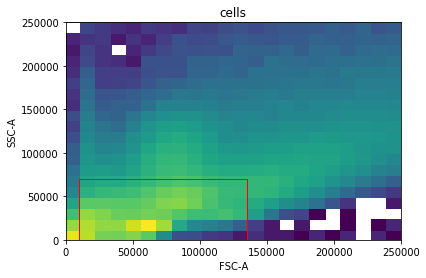

In [16]:
gating.plot_gate('cells')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc4019dba8>)

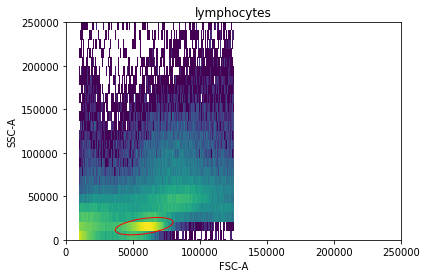

In [17]:
gating.plot_gate('lymphocytes')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc403e3940>)

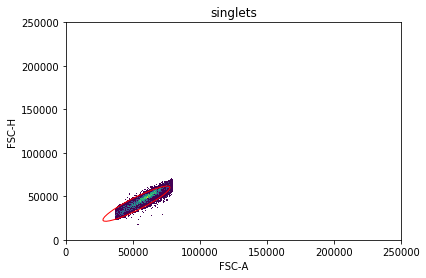

In [18]:
gating.plot_gate('singlets')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc27ae19b0>)

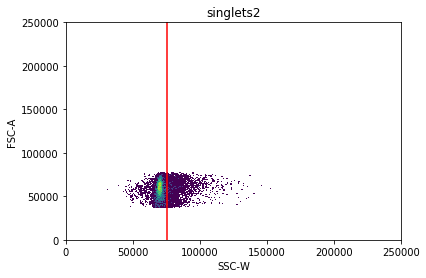

In [19]:
gating.plot_gate('singlets2')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc40187e80>)

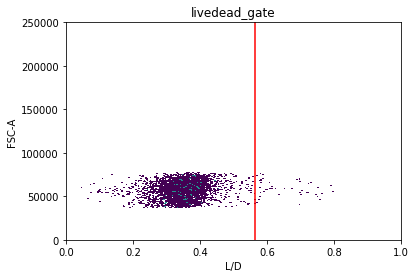

In [21]:
gating.plot_gate('livedead_gate')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc402b4550>)

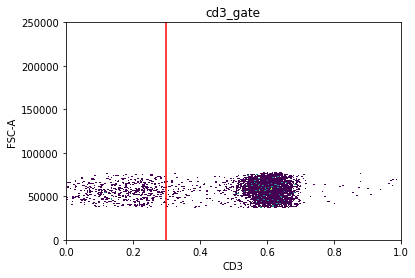

In [23]:
gating.plot_gate('cd3_gate')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc4028e710>)

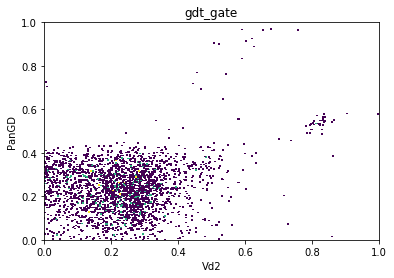

In [24]:
gating.plot_gate('gdt_gate')

In [26]:
gating.populations

{'root': {'population_name': 'root',
  'prop_of_parent': 1.0,
  'prop_of_total': 1.0,
  'warnings': [],
  'parent': 'NA',
  'children': ['cells'],
  'geom': {},
  'index': array([     0,      1,      2, ..., 374701, 374702, 374703])},
 'cells': {'population_name': 'cells',
  'index': array([     0,      1,      2, ..., 374694, 374695, 374696]),
  'prop_of_parent': 0.7332801357871813,
  'prop_of_total': 0.7332801357871813,
  'parent': 'root',
  'children': ['lymphocytes'],
  'geom': {'x_min': 10000,
   'x_max': 125000,
   'y_min': 0,
   'y_max': 70000,
   'shape': 'rect',
   'x': 'FSC-A',
   'y': 'SSC-A'}},
 'lymphocytes': {'population_name': 'lymphocytes',
  'index': array([     1,      2,     21, ..., 374195, 374277, 374474]),
  'prop_of_parent': 0.329210992746476,
  'prop_of_total': 0.24140388146376873,
  'parent': 'cells',
  'children': ['singlets'],
  'geom': {'mean': (58396.20555879453, 15702.576905698854),
   'width': 17383.37259919751,
   'height': 44300.51957162386,
   'angle':

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc40139438>)

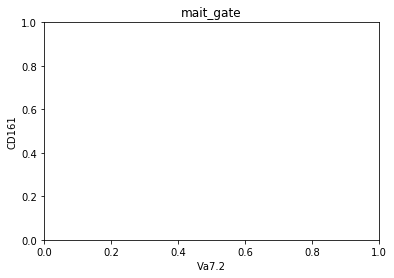

In [25]:
gating.plot_gate('mait_gate')